# Function colormap

## Synopse

Create a colormap table.

- **ct = colormap(type='gray')**

  - **ct**: Image. 

  - **type**: String. Type of the colormap. Options: 'gray', 'hsv', 'hot', 'cool', 'bone','copper', 'pink'.

In [1]:
import numpy as np
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898   
import numpy as np
import colorsys

def colormap(type='gray'):

    if type == 'gray':
        ct = np.transpose(np.resize(np.arange(256), (3,256)))
    elif type == 'hsv':
        h = np.arange(256)/255.
        s = np.ones(256)
        v = np.ones(256)
        ct = ia898.src.normalize(np.reshape(map(colorsys.hsv_to_rgb, h, s, v), (256,3)), [0,255]).astype(np.uint8)
    elif type == 'hot':
        n = np.floor(256./3) #np.floor(3./8*256)
        r = np.concatenate((np.arange(1,n+1)/n, np.ones(256-n)), 1)[:,np.newaxis]
        g = np.concatenate((np.zeros(n), np.arange(1,n+1)/n, np.ones(256-2*n)), 1)[:,np.newaxis]
        b = np.concatenate((np.zeros(2*n), np.arange(1,256-2*n+1)/(256-2*n)), 1)[:,np.newaxis]
        ct = ia.normalize(np.concatenate((r,g,b), 1), [0,255]).astype(np.uint8)
    elif type == 'cool':
        r = (np.arange(256)/255.)[:,np.newaxis]
        ct = ia898.src.normalize(np.concatenate((r, 1-r, np.ones((256,1))), 1), [0,255]).astype(np.uint8)
    elif type == 'bone':
        ct = ia898.src.normalize((7 * colormap('gray') + colormap('hot')[:,::-1]) / 8., [0,255]).astype(np.uint8)
    elif type == 'copper':
        cg = colormap('gray')/255.
        fac = np.dot(cg, [[1.25,0,0],[0,0.7812,0],[0,0,0.4975]])
        aux = np.minimum(1, fac)
        ct = ia898.src.normalize(aux).astype(np.uint8)
    elif type == 'pink':
        ct = ia898.src.normalize(np.sqrt((2*colormap('gray') + colormap('hot')) / 3), [0,255]).astype(np.uint8)
    else:
        ct = np.zeros((256,3))
    return ct

## Description

Create pseudo colormap tables.

## Examples

In [12]:
testing = (__name__ == "__main__")
if testing:
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

### Example 1

In [13]:
if testing:
    tables = [ 'gray',  'cool', 'copper']
    naopassou = ['hsv', 'hot','bone','pink']
    r,f = np.indices((10,256), 'uint8')
    ia.adshow(f, 'gray scale')

    for table in tables:
        print(table)
        cm = ia.colormap(table)
        g = ia.applylut(f, cm)
        print(g.dtype)
        g = g.astype('uint8')
        if len(g.shape)==3:
            g = g.transpose(1,2,0)
        print(g.dtype,g.shape)
        ia.adshow(g, table)
        

""
gray scale


gray
int64
uint8 (10, 256, 3)


""
gray


cool
uint8
uint8 (10, 256, 3)


""
cool


copper
uint8
uint8 (10, 256, 3)


""
copper


### Example 2

Plotting the colormap table

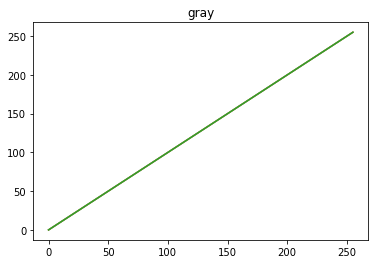

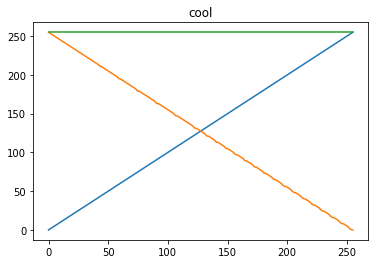

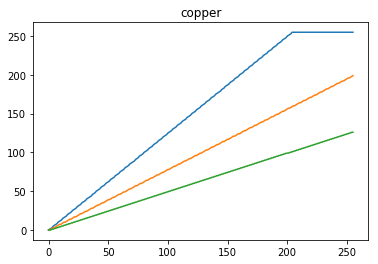

In [14]:
if testing:
    for table in tables:
        Tc = ia.colormap(table)
        plt.plot(Tc[:,0])
        plt.plot(Tc[:,1])
        plt.plot(Tc[:,2])
        plt.title(table)
        plt.show()

### Example 3

With image

""
gray

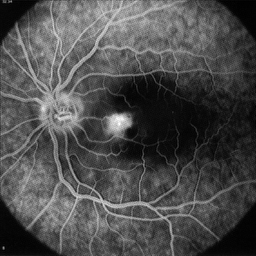

""
cool

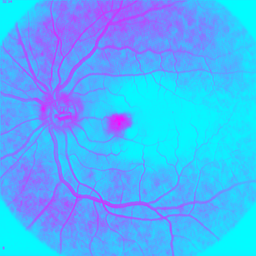

""
copper

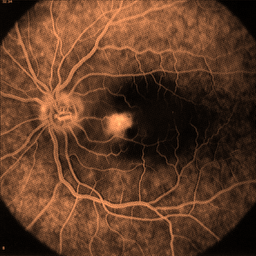

In [17]:
if testing:
    f = mpimg.imread('../data/retina.tif')
    for table in tables:
        Tc = ia.colormap(table)
        g = ia.applylut(f,Tc).astype('uint8')
        if len(g.shape)==3:
            g = g.transpose(1,2,0)
        ia.adshow(g, table)

## See Also

- [ia636:applylut](applylut.ipynb) Lookup Table application

## References

- [Wikipedia HSL and HSV](http://en.wikipedia.org/wiki/HSL_and_HSV)

In [20]:
if testing:
    print('testing gray')
    print(repr(colormap('gray')[0::51]) == repr(np.array(
          [[  0,   0,   0],
           [ 51,  51,  51],
           [102, 102, 102],
           [153, 153, 153],
           [204, 204, 204],
           [255, 255, 255]],np.uint8)))

testing gray
False


In [21]:
if testing:
    print('testing hsv')
    print(repr(colormap('hsv')[0::51]) == repr(np.array(
          [[255,   0,   0],
           [203, 255,   0],
           [  0, 255, 102],
           [  0, 102, 255],
           [204,   0, 255],
           [255,   0,   0]],np.uint8)))

testing hsv


ValueError: total size of new array must be unchanged

In [22]:
if testing:
    print('testing hot')
    print(repr(colormap('hot')[0::51]) == repr(np.array(
          [[  2,   0,   0],
           [138,   0,   0],
           [255,  18,   0],
           [255, 154,   0],
           [255, 255,  51],
           [255, 255, 255]],np.uint8)))

testing hot


/home/adessowiki/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


IndexError: axis 1 out of bounds [0, 1)

In [23]:
if testing:
    print('testing cool')
    print(repr(colormap('cool')[0::51]) == repr(np.array(
          [[  0, 255, 255],
           [ 51, 204, 255],
           [102, 153, 255],
           [153, 102, 255],
           [204,  50, 255],
           [255,   0, 255]],np.uint8)))

testing cool
True


In [24]:
if testing:
    print('testing bone')
    print(repr(colormap('bone')[0::51]) == repr(np.array(
          [[  0,   0,   0],
           [ 44,  44,  61],
           [ 89,  91, 121],
           [133, 153, 165],
           [184, 210, 210],
           [255, 255, 255]],np.uint8)))

testing bone


/home/adessowiki/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


IndexError: axis 1 out of bounds [0, 1)

In [25]:
if testing:
    print('testing copper')
    print(repr(colormap('copper')[0::51]) == repr(np.array(
          [[  0,   0,   0],
           [ 51,  31,  20],
           [102,  63,  40],
           [153,  95,  60],
           [204, 127,  81],
           [255, 159, 101]],np.uint8)))
    print('testing pink')
    print(repr(colormap('pink')[0::51]) == repr(np.array(
          [[  0,   0,   0],
           [142,  93,  93],
           [197, 137, 131],
           [218, 197, 161],
           [237, 237, 197],
           [255, 255, 255]],'uint8')))

testing copper
False
testing pink


/home/adessowiki/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


IndexError: axis 1 out of bounds [0, 1)